# Introduction: Visualizing Pollution Burden & Income Distributions in California

## Goal
*In this tutorial, you'll overlay pollution burden scores and median income data on a map of California to identify which census tracts are disproportionately affected by pollution.*

We'll walk you step-by-step through the entire process, from importing in the datasets to processing the data to making the visualizations. By the end of the tutorial, you'll become much more familiar with visualizing geospatial data and will hopefully be able to draw real-world conclusions about how environmental impacts are felt in California. You'll also have made several maps that look something like this:

(source: CalEnviroScreen 4.0 Housing Burden visualization)

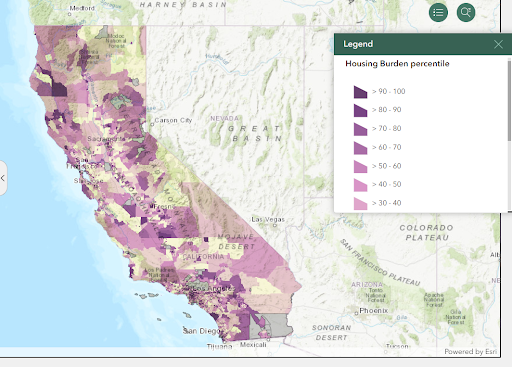

## Overview of Datasets Used
**Pollution Burden Score:**

[CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), an online tool created by the California Office of Environmental Health Hazard Assessment, allows users to visualize different environmental parameters by census tract on a map of CA. This data (downloadable [here](https://oehha.ca.gov/calenviroscreen/maps-data/download-data)) will be used in this tutorial. The dataset contains a number of environmental parameters, such as each tract's exposure to traffic, exposure to ozone, proximity to waste sites, and more. For this tutorial, we'll use the *Pollution Burden Score* parameter, which is an overall measure of how much pollution a tract is exposed to.

**Median Income:**

The US Census Bureau collects [data](https://data.census.gov/) for census tracts across the United States on different parameters, such as race, commute time, income, and more. We'll be using the 2022 5-year estimates data for *median household income* (downloadable [here](https://data.census.gov/table/ACSST5Y2022.S1903?q=per%20capita%20income&g=040XX00US06$1400000)), which aggregates data collected for each CA census tract from Jan 1, 2018 - December 31, 2022.

## Prerequisites
This tutorial is for people who have a general interest in visualizing environmental data! In terms of technical skills, all you need is basic familiarity with Python, working with dataframes, and plotting figures.

## Tutorial Overview
- Part 1: Import Libraries

- Part 2: Environmental Data
  - Import, process, and visualize pollution burden scores on a map of California

- Part 3: Income Data
  - Import and process median income data, merge with census tract shapes, and visualize on a map of CA

- Part 4: Merge Data
  - Merge the environmental and income datasets, and visualize both parameters

- Optional: Visualizing a Different Way (with geoplot)
  - Use geoplot to plot two axes of data on the same map. Intended for more advanced users.



---



# Part 1: Getting Started

Let's download the datasets and relevant Python modules. We'll explain more along the way!

### Datasets ###

As described above, we'll be working with *pollution burden data* from the California Office of Environmental Health Hazard Assessment and *median household income data* from the US Census Bureau.

This Drive folder, [CA_Census_Tract_Visualizations](https://drive.google.com/drive/folders/1go4OrkbIxCZ3ZqDvfSKkUuYp6e9uxKbH?usp=drive_link), contains the datasets. ***Add the folder as a shortcut to "My Drive" in your Google Drive account:***
  - Click on the link to open the folder
  - Right-click on the folder, select "Organize" from the dropdown menu, then select "Add Shortcut"
  - Click on the "All Locations" tab, select "My Drive," and click "Add"

Here's what that folder contains:

- **EnviroScreen_Data** subfolder contains shapefiles containing the environmental data, as well as the 'shapes' of each of the tracts, which will be useful when we draw the map. It also contains explanations of the different parameters (in CES4_Parameters.pdf)

- **Income_Data** subfolder contains a csv of the income data by census tract, as well as other info and metadata

Now, let's connect your Google Drive account to Colab so this tutorial can access the data in the folder you just added to your Drive. Colab will prompt you to select a Google account; *make sure this is the same account you added the shortcut to!*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Save the Google Drive path to this folder:

In [ ]:
drive_path = '/content/drive/MyDrive/CA_Census_Tract_Visualizations/'

### Import Python Modules

Here is a quick description of what we'll import in the next code block:
- **pandas**, a library for data analysis & manipulation (see [pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html) for more info)
- **GeoPandas**, a library that extends pandas functionality to work with geospatial data (see [GeoPandas User Guide](https://geopandas.org/en/stable/docs/user_guide.html))
- **matplotlib.pyplot**, a module in the Matplotlib library; Matplotlib helps us create visualizations in Python, and the pyplot module makes it similar to working with MATLAB (see [Matplotlib.pyplot functions](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html))
- **numpy**, a library that helps work with arrays and perform mathematical operations (see [NumPy User Guide](https://numpy.org/doc/stable/user/))

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Part 2: Environmental Data

Here, we'll import, process, and visualize Pollution Burden Scores on a map of CA.

###Import Data

The environmental data is stored in a *shapefile dataset* — a collection of files that help organize geospatial information associated with the data. We will read data from the .shp file, which has a column for the geometry of each census tract. We need to use *geopandas* (which we just imported!) to read the data into a **GeoDataFrame**.

Let's read in the data, then see the first 5 rows (or the 'head') of the dataframe:

In [ ]:
env_gdf = gpd.read_file(drive_path + "EnviroScreen_Data/CES4 Final Shapefile.shp")

In [ ]:
env_gdf.head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


There are a lot of entries here! Let's break it down.

Each row corresponds to a different census tract in CA. The ***Tract*** column provides the census tract's GEOID — its unique geographic identification number, assigned by the US Census Bureau. It is a 10-digit number: the first digit (6) corresponds to the state of CA, the next 3 digits corresponds to a county, and the final 6 digits indicate the specific tract. Think of it as a 10-digit integer, even though it's stored as a decimal in scientific notation here.

Next, the ***ZIP***, ***County***, and ***ApproxLoc*** columns help us situate where this census tract is in CA.

Now, scroll to the very last column of the table, labeled ***geometry***. This represents the census tract as a Polygon object, with coordinates indicating its boundaries. *This is key for us to be able to plot the data on a map!*

The rest of the columns provide different environmental data about each tract. Let's print the columns so we can see what these parameters are.

In [ ]:
print("Total number of columns: ", len(env_gdf.columns))
print(env_gdf.columns)

Total number of columns:  67
Index(['Tract', 'ZIP', 'County', 'ApproxLoc', 'TotPop19', 'CIscore',
       'CIscoreP', 'Ozone', 'OzoneP', 'PM2_5', 'PM2_5_P', 'DieselPM',
       'DieselPM_P', 'Pesticide', 'PesticideP', 'Tox_Rel', 'Tox_Rel_P',
       'Traffic', 'TrafficP', 'DrinkWat', 'DrinkWatP', 'Lead', 'Lead_P',
       'Cleanup', 'CleanupP', 'GWThreat', 'GWThreatP', 'HazWaste', 'HazWasteP',
       'ImpWatBod', 'ImpWatBodP', 'SolWaste', 'SolWasteP', 'PollBurd',
       'PolBurdSc', 'PolBurdP', 'Asthma', 'AsthmaP', 'LowBirtWt', 'LowBirWP',
       'Cardiovas', 'CardiovasP', 'Educatn', 'EducatP', 'Ling_Isol',
       'Ling_IsolP', 'Poverty', 'PovertyP', 'Unempl', 'UnemplP', 'HousBurd',
       'HousBurdP', 'PopChar', 'PopCharSc', 'PopCharP', 'Child_10',
       'Pop_10_64', 'Elderly65', 'Hispanic', 'White', 'AfricanAm', 'NativeAm',
       'OtherMult', 'Shape_Leng', 'Shape_Area', 'AAPI', 'geometry'],
      dtype='object')


The column names give us a general idea of our data. For more detailed explanations on each parameter, navigate to the earlier Drive folder, the EnviroScreen_Data subfolder, and open up *CES4_Parameters.pdf*.

We're choosing to look at Pollution Burden Score, the ***PolBurdSc*** column. It provides the average of various pollution burden indicators (like exposure level to ozone, PM2.5, traffic, etc.), scaled to be in the range 0 (least affected) to 10 (most affected)

To give you an appreciation of how much data we're working with, print the number of rows of the dataframe:

In [ ]:
len(env_gdf)

8035

There is data for 8035 tracts. We're working with a dataframe that has 8035 rows and 67 columns! That's a lot of information.

### Filter the Data

Since there's so much information, let's make the dataset easier to work with by *filtering* it — selecting only the columns we care about.

We definitey want the census tract ID (***Tract*** column), the tract's shape (***geometry***), and the pollution burden score (***PolBurdSc***). It would also be helpful to have ***County*** to contextualize where in CA the tract is located in.

Let's create a dataframe filtered by the above columns.

In [ ]:
env_cols = ['Tract', 'County', 'PolBurdSc', 'geometry']
env_gdf_filter = env_gdf[env_cols]
env_gdf_filter.head()

,Tract,County,PolBurdSc,geometry
0,6.083002e+09,Santa Barbara,4.972803,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,Santa Barbara,6.577399,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,Santa Barbara,4.929880,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,Santa Barbara,2.803875,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,Santa Barbara,2.854662,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


That's less overwhelming to work with!

One more thing — as mentioned earlier, ***Tract*** is currently stored as a float in scientific notation, but it is essentially a 10-digit integer. Let's convert the values to integers to avoid running into issues later, when merging this dataset with the income data.

In [ ]:
env_gdf_filter.loc[:, 'Tract'] = env_gdf_filter['Tract'].astype(int)
env_gdf_filter.head()

<ipython-input-9-d28aed7f9c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_gdf_filter.loc[:, 'Tract'] = env_gdf_filter['Tract'].astype(int)
<ipython-input-9-d28aed7f9c12>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  env_gdf_filter.loc[:, 'Tract'] = env_gdf_filter['Tract'].astype(int)


,Tract,County,PolBurdSc,geometry
0,6083002103,Santa Barbara,4.972803,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6083002402,Santa Barbara,6.577399,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6083002102,Santa Barbara,4.929880,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6083002010,Santa Barbara,2.803875,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6083002009,Santa Barbara,2.854662,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


Now the data is as we'd like it!

### Visualize

Now, the interesting part — let's visualize the pollution burden scores on a map of California. We use the *plot* function in GeoPandas, which uses matplotlib to plot data in a GeoDataFrame.

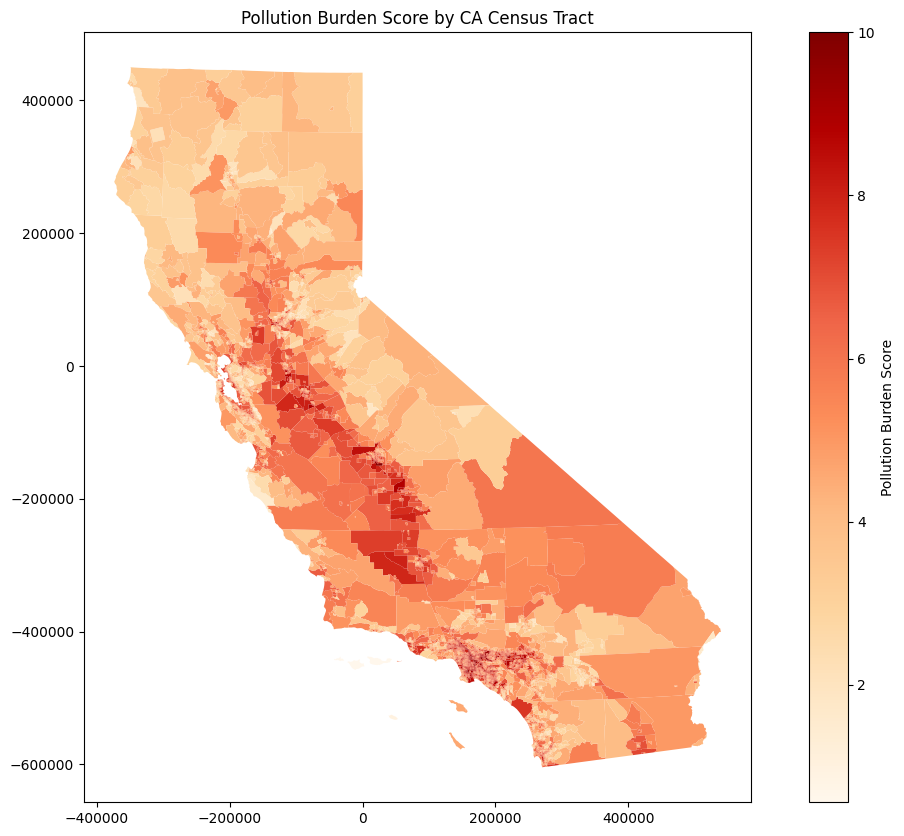

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))                            # create the figure
env_gdf_filter.plot(column='PolBurdSc',
                    ax=ax,
                    legend=True,
                    legend_kwds={'label': "Pollution Burden Score"},      # label for the legend
                    cmap='OrRd')                                          # set map color scheme to Orange-Red
plt.title('Pollution Burden Score by CA Census Tract')
plt.show()

Recall that pollution burden score is a scaled value from 0 (least affected) to 10 (most affected). Based on the map, the darker red areas — central CA and LA County — appear to be most exposed to various sources of pollution. People in northern CA are relatively less affected.

***Optional:***

- *You can try repeating the above steps for a different environmental parameter other than pollution burden score. Try similarly creating a filtered dataframe and a map. What trends do you notice?*

- *Want a challenge? Try figuring out how to print the IDs of the 10 most affected census tracts. Also, census tracts are relatively fine-grain resolution, so try instead aggregating the scores by county (recall that there's a 'County' column), and plot and print out the top 10 counties affected.*

# Part 3: Income Data

Here, we'll import, process, and visualize median household income data on a map of CA.

### Import Data

Unlike the environmental data, which was stored as a shapefile database, the income data is in a csv file. We'll use *pandas* to read it into a **DataFrame**. Let's import and examine the data.

In [ ]:
income_df = pd.read_csv(drive_path + "Income_Data/CA_2022MedianIncome/CA_Income_Data.csv")

<ipython-input-11-cec9470c68d3>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,110,111,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  income_df = pd.read_csv(drive_path + "Income_Data/CA_2022MedianIncome/CA_Income_Data.csv")


In [ ]:
income_df.head()

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,1400000US06001400100,Census Tract 4001; Alameda County; California,1377,131,1021,143,69,54,0,13,...,**,"250,000+",***,227813,105447,227756,121924,"250,000+",***,NaN
2,1400000US06001400200,Census Tract 4002; Alameda County; California,876,86,669,103,32,35,0,13,...,10314,146383,853,184750,51609,133889,43924,228646,22304,NaN
3,1400000US06001400300,Census Tract 4003; Alameda County; California,2638,244,1642,204,333,122,19,29,...,23342,"250,000+",***,90917,46177,70000,32412,197744,105243,NaN
4,1400000US06001400400,Census Tract 4004; Alameda County; California,1760,174,1211,178,180,103,0,13,...,9733,166071,39103,113125,52394,85000,75142,-,**,NaN


We can see that the column names (in bold) and the column labels (row 0) are not very clear! However, if you inspect the csv (in the earlier Drive folder, in the Income_Data subfolder), you can find our column of interest. The label is *Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!*, and the corresponding column name is ***S1903_C03_001E***.

Note that, unlike the environmental data, this dataset does *not* have census tract geometry. That's also why we were able to read it directly into a DataFrame using pandas, as opposed to a GeoDataFrame using GeoPandas.

Importantly, the column ***GEO_ID*** in this data corresponds to the ***Tract*** column in the environmental data, but it looks a little different here; there's a prefix (1400000US0) that we don't need. Eventually, we want the two datasets to share a column when we merge them. So, we'll have to tweak the ***GEO_ID*** values to match up with that of ***Tract***.

Let's similarly filter our dataframe to just have ***GEO_ID***, ***NAME***, and the ***S1903_C03_001E*** (which contains Median Household Income data). Also, we don't need row 0, which contains column labels rather than data.

In [ ]:
# Filter by relevant columns and drop row 0
income_cols = ['GEO_ID', 'NAME', 'S1903_C03_001E']
income_df_filter = income_df[income_cols].iloc[1:].reset_index(drop=True)

# 'S1903_C03_001E' isn't really a helpful name; let's rename it
income_df_filter = income_df_filter.rename(columns={'S1903_C03_001E': 'Median_Household_Income'})

Let's print a few entries from our new dataframe.

In [ ]:
income_df_filter[20:50]

,GEO_ID,NAME,Median_Household_Income
20,1400000US06001402500,Census Tract 4025; Alameda County; California,34250
21,1400000US06001402600,Census Tract 4026; Alameda County; California,45560
22,1400000US06001402700,Census Tract 4027; Alameda County; California,115750
23,1400000US06001402801,Census Tract 4028.01; Alameda County; California,74931
24,1400000US06001402802,Census Tract 4028.02; Alameda County; California,-
25,1400000US06001402900,Census Tract 4029; Alameda County; California,37973
26,1400000US06001403000,Census Tract 4030; Alameda County; California,32077
27,1400000US06001403100,Census Tract 4031; Alameda County; California,136071
28,1400000US06001403301,Census Tract 4033.01; Alameda County; California,34417
29,1400000US06001403302,Census Tract 4033.02; Alameda County; California,148235


This is better to look at! But notice a couple of issues with the data in the ***Median_Household_Income*** column.
- Row 24 has missing data; there is a "-" instead of a numerical value
- Row 48 has doesn't have numerical data; it says "250,000+"

We need to fix this and ensure all values are numeric before plotting.

### Clean the Data

Based on the issues we identified earlier, let's clean up the data. There are a few things we need to do:
- Modify the 'GEO_ID' column so it matches up with the 10-digit integer values in 'Tract'
- Remove rows with missing values ("-")
- Modify rows with the value "250,000+" to be the number 2500000

First, let's fix the GEO_IDs. For each value, we'll remove the prefix "1400000US0" and convert the result to an integer as we did before.

In [ ]:
income_df_filter['GEO_ID'] = income_df_filter['GEO_ID'].str.replace('1400000US0', '')
income_df_filter['GEO_ID'] = [int(value) for value in income_df_filter['GEO_ID']]
income_df_filter.head()


,GEO_ID,NAME,Median_Household_Income
0,6001400100,Census Tract 4001; Alameda County; California,234236
1,6001400200,Census Tract 4002; Alameda County; California,225500
2,6001400300,Census Tract 4003; Alameda County; California,164000
3,6001400400,Census Tract 4004; Alameda County; California,158836
4,6001400500,Census Tract 4005; Alameda County; California,95078


Great! Next, we'll remove rows with missing data.

Let's check how many rows our dataframe currently has.

In [ ]:
len(income_df_filter)

9129

Then, let's remove rows with "-" for ***Median_Household_Income***.

In [ ]:
income_df_filter = income_df_filter[income_df_filter['Median_Household_Income'] != '-']
income_df_filter = income_df_filter.reset_index(drop=True)

Now, let's check our number of rows.

In [ ]:
len(income_df_filter)

8988

We removed over 100 rows of missing data!

Lastly, let's reformat the value "250,000+". Even though this indicates that the median income of that census tract is probably *above* $250,000, we'll use this minimum value as a conservative estimate of that tract's median income, since we don't have more detailed information.

And as always, we'll convert all the income values to integers.

In [ ]:
income_df_filter['Median_Household_Income'] = [value.replace('+', '') for value in income_df_filter['Median_Household_Income']]
income_df_filter['Median_Household_Income'] = [value.replace(',', '') for value in income_df_filter['Median_Household_Income']]
income_df_filter['Median_Household_Income'] = [int(value) for value in income_df_filter['Median_Household_Income']]

AttributeError: ignored

In [ ]:
income_df_filter[45:50]

,GEO_ID,NAME,Median_Household_Income
45,6001404502,Census Tract 4045.02; Alameda County; California,227361
46,6001404600,Census Tract 4046; Alameda County; California,222617
47,6001404700,Census Tract 4047; Alameda County; California,250000
48,6001404800,Census Tract 4048; Alameda County; California,114083
49,6001404900,Census Tract 4049; Alameda County; California,151860


Looking at Row 47, it looks like we've fixed it!

### Merge with Census Tract Shapes
Now that we have the cleaned income data, we need to merge it with a file that contains census tract *geometries* in order to make a map like we did before.


Recall that the income data does *not* have census tract geometry. If we want to map it, we need to get these shapes somehow.

A Google search might lead you to the [TIGER/Line](census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html) shapefiles, provided by the US Census Bureau. Remember from when we worked with the environmental data that tract geometries are stored as a *shapefile dataset* — a collection of files organizing geospatial information.

This is the case for the TIGER/Line tract boundaries as well. We've downloaded the files for you; it's called **tl_2020_06_tract.zip** in the Drive folder, in the subfolder Income_Data.

Let's load in the census tract shapes into a GeoDataFrame (because it has geometry!).

In [ ]:
tracts_gdf = gpd.read_file(drive_path + "Income_Data/tl_2020_06_tract.zip")


In [ ]:
tracts_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


Some of these columns should look familiar by now! ***geometry*** is what we need and was missing from the income data, and ***GEOID*** matches up with our ***GEO_ID*** column in the income data. Note that ***STATEFP***, ***COUNTYFP***, and ***TRACTCE*** indicate the 2-digit state identifier (in CA's case it's only 1-digit: 6), 3-digit county identifier, and 6-digit tract identifier — parts of the GEOID, as mentioned earlier when we were working with environmental data.

We only need the ***GEOID*** and ***geometry***, so let's filter for that.

In [ ]:
tract_cols = ['GEOID', 'geometry']
tracts_gdf_filter = tracts_gdf[tract_cols]
tracts_gdf_filter.head()

,GEOID,geometry
0,06029004402,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06047000802,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06085501402,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06005000102,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06029004901,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


In [ ]:
tracts_gdf_filter['GEOID'][:5]

0    06029004402
1    06047000802
2    06085501402
3    06005000102
4    06029004901
Name: GEOID, dtype: object

But wait! The data type of ***GEOID*** is object, but we need the values to be integers. Let's quickly convert.

In [ ]:
tracts_gdf_filter.loc[:, 'GEOID'] = tracts_gdf_filter['GEOID'].astype(int)



<ipython-input-34-bca394b5cda5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracts_gdf_filter.loc[:, 'GEOID'] = tracts_gdf_filter['GEOID'].astype(int)
<ipython-input-34-bca394b5cda5>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tracts_gdf_filter.loc[:, 'GEOID'] = tracts_gdf_filter['GEOID'].astype(int)


In [ ]:
tracts_gdf_filter['GEOID'][:5]

0    6029004402
1    6047000802
2    6085501402
3    6005000102
4    6029004901
Name: GEOID, dtype: int64

Better!

Now, we can *merge* the income data with the census tract shapes. We need to choose a column that's common between the two datasets to match rows on. Because of our earlier processing, the ***GEOID*** column in census tract data and the ***GEO_ID*** column in the income data match up!

Let's merge.

In [ ]:
income_tracts_gdf = tracts_gdf_filter.merge(income_df_filter, left_on="GEOID", right_on="GEO_ID")
income_tracts_gdf.head()

,GEOID,geometry,GEO_ID,NAME,Median_Household_Income
0,6029004402,"POLYGON ((-119.33828 35.58143, -119.33827 35.5...",6029004402,Census Tract 44.02; Kern County; California,27807
1,6047000802,"POLYGON ((-120.59599 37.34121, -120.59596 37.3...",6047000802,Census Tract 8.02; Merced County; California,76397
2,6085501402,"POLYGON ((-121.87381 37.34412, -121.87361 37.3...",6085501402,Census Tract 5014.02; Santa Clara County; Cali...,105771
3,6005000102,"POLYGON ((-120.61016 38.41560, -120.61000 38.4...",6005000102,Census Tract 1.02; Amador County; California,55833
4,6029004901,"POLYGON ((-119.25262 35.79043, -119.25259 35.7...",6029004901,Census Tract 49.01; Kern County; California,41218


Now, notice that for every tract ID, we have both geometry and the corresponding income data.

### Visualize

We finally have all the information we need to make a map of CA showing median income.

The process is the same as the last map we made for environmental data.

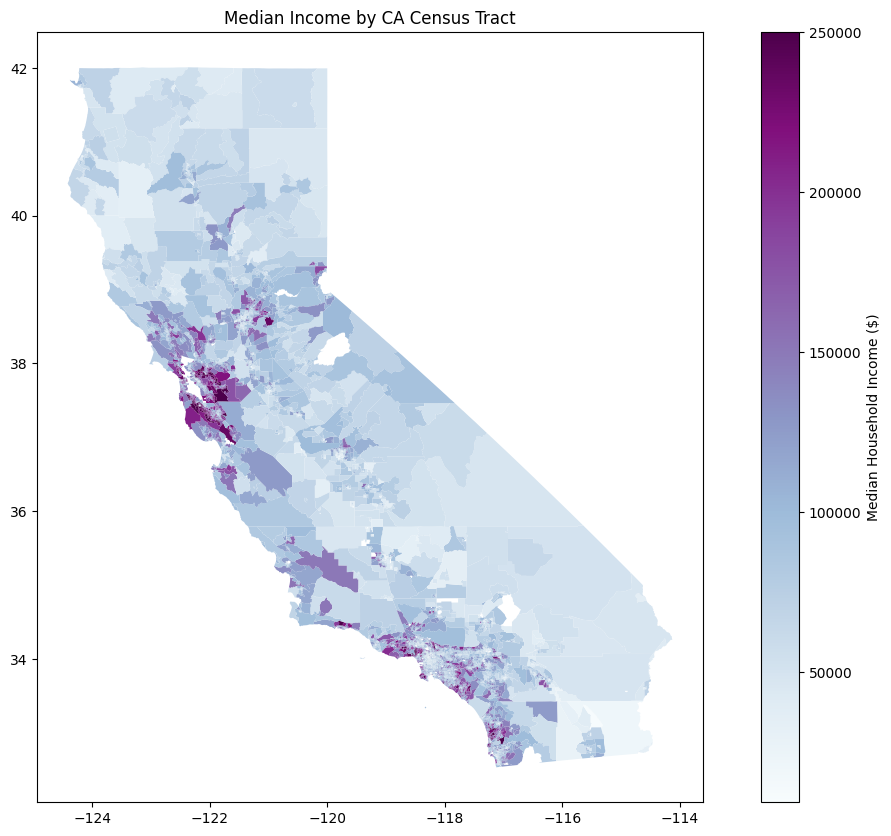

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))                                    # create the figure
income_tracts_gdf.plot(column='Median_Household_Income',
                            ax=ax,
                            legend=True,
                            legend_kwds={'label': "Median Household Income ($)"},
                            cmap='BuPu',                                          # set map color scheme to Blue-Purple
                            missing_kwds={'color': 'black'}
                            )
plt.title('Median Income by CA Census Tract')
plt.show()

Note a couple of white patches for missing data, but overall, this map shows us that people in the Bay Area and the coastal areas of Southern California earn the most money! Remember also that we capped the maximum value at $250,000 as a conservative estimate — there are definitely counties where the median income is higher than that...

***Optional:***

- *Try printing the IDs of the top 10 census tracts with highest median household income. Based on their county code (recall the **COUNTYFP** column), residents of which counties appear to earn the most?*

- *Want a challenge? We provided links to the sources for both US Census Bureau data and the TIGER/Line census tract shapefiles. Choose a different data table and optionally a different state in the US. Try repeating the above steps (cleaning both data sources, merging them, and plotting) for a different dataset and/or a different state! You know how to do all these steps now :)*

# Part 4: Merge Pollution Burden & Median Income Data

Here, we'll merge the two datasets that we've been working with and visualize both parameters (pollution burden score and median income) on a map.

## Merge the Datasets

Let's look at our two datasets again to remind ourselves of what information we have in each:

In [ ]:
# Pollution Burden data
env_gdf_filter.head()

,Tract,County,PolBurdSc,geometry
0,6083002103,Santa Barbara,4.972803,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6083002402,Santa Barbara,6.577399,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6083002102,Santa Barbara,4.929880,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6083002010,Santa Barbara,2.803875,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6083002009,Santa Barbara,2.854662,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [ ]:
print("\nThere are", len(env_gdf_filter), "rows.")


There are 8035 rows.


In [ ]:
# Median Income data (merged with Tract geometries)
income_tracts_gdf.head()

,GEOID,geometry,GEO_ID,NAME,Median_Household_Income
0,6029004402,"POLYGON ((-119.33828 35.58143, -119.33827 35.5...",6029004402,Census Tract 44.02; Kern County; California,27807
1,6047000802,"POLYGON ((-120.59599 37.34121, -120.59596 37.3...",6047000802,Census Tract 8.02; Merced County; California,76397
2,6085501402,"POLYGON ((-121.87381 37.34412, -121.87361 37.3...",6085501402,Census Tract 5014.02; Santa Clara County; Cali...,105771
3,6005000102,"POLYGON ((-120.61016 38.41560, -120.61000 38.4...",6005000102,Census Tract 1.02; Amador County; California,55833
4,6029004901,"POLYGON ((-119.25262 35.79043, -119.25259 35.7...",6029004901,Census Tract 49.01; Kern County; California,41218


In [ ]:
print("\nThere are", len(income_tracts_gdf), "rows.")


There are 8988 rows.


As before, let's merge on the tract ID. We already have income data and tract geometry in one GeoDataFrame, so the only additional information we need is ***PolBurdSc***, rather than all of the columns in the environmental GeoDataFrame. Let's keep the ***Tract*** column as well to double-check that our merge is happening correctly.

In [ ]:
env_income_gdf = income_tracts_gdf.merge(env_gdf_filter[['Tract', 'PolBurdSc']], left_on='GEO_ID', right_on='Tract')
env_income_gdf.head()

,GEOID,geometry,GEO_ID,NAME,Median_Household_Income,Tract,PolBurdSc
0,6029004402,"POLYGON ((-119.33828 35.58143, -119.33827 35.5...",6029004402,Census Tract 44.02; Kern County; California,27807,6029004402,7.912168
1,6047000802,"POLYGON ((-120.59599 37.34121, -120.59596 37.3...",6047000802,Census Tract 8.02; Merced County; California,76397,6047000802,6.055134
2,6085501402,"POLYGON ((-121.87381 37.34412, -121.87361 37.3...",6085501402,Census Tract 5014.02; Santa Clara County; Cali...,105771,6085501402,4.672250
3,6005000102,"POLYGON ((-120.61016 38.41560, -120.61000 38.4...",6005000102,Census Tract 1.02; Amador County; California,55833,6005000102,2.663180
4,6029004901,"POLYGON ((-119.25262 35.79043, -119.25259 35.7...",6029004901,Census Tract 49.01; Kern County; California,41218,6029004901,5.850850


Okay, we have all the information we need. Let's check out the number of rows.

In [ ]:
len(env_income_gdf)

6786

Unfortunately, it seems that in the process of merging, we've lost a lot of information. The environmental data had 8035 rows and the income data had 8988 rows, but after the merge, we have only 6786 rows.

The merge retains only the rows (or census tract IDs) where information is available in **both** the income data *and* the environmental data. So it seems that there's some kind of inconsistency with the tract IDs between each dataset.

That's strange, and we can look more into each dataset specifically. But for now we'll proceed.

## Create Danger Level Metric

Now, we want to visualize the impacts of pollution and income data in one map. One simple approach to do this is to create a *Danger Level* metric. Intuitively, it will be higher for areas with a high pollution burden score (at higher risk environmentally), and areas with low income levels (at higher risk economically).

We'll walk through a simple way to implement a danger level metric: by multiplying the pollution burden by inverse of median income. We use the inverse because higher income should mean lower danger level, not higher. *Note that this method has its limitations, which we'll discuss later!*

First, scale income. For a given average income 𝑖, from a set of average incomes, 𝐼, the inverse income ⅉ is given by the following equation:

 $j(i) = \frac{i-\min{I}}{\max{I} - \min{I}}$

In [ ]:
income_min = env_income_gdf['Median_Household_Income'].min()
income_max = env_income_gdf['Median_Household_Income'].max()
env_income_gdf['Inverse_Scaled_Income'] = 10 - ((env_income_gdf['Median_Household_Income'] - income_min) / (income_max - income_min))

The 'Raw' Danger Level is given by the following formula:
$d(j, p)= j \times p$, where $j$ is scaled inverse income and $p$ is pollution burden score.

We'll add this metric as a new column in our GeoDataFrame:

In [ ]:
env_income_gdf['Adjusted_Danger_Level'] = env_income_gdf['PolBurdSc'] * env_income_gdf['Inverse_Scaled_Income']


The Danger Level is then adjusted to vary from 0 to 10:
$A(d)= 10 \times \frac{d -  \min{D}}{\max{D}\min{D}}$

In [ ]:
# rescale adjusted Danger_Level to 0.0 to 10.0
adj_min = env_income_gdf['Adjusted_Danger_Level'].min()
adj_max = env_income_gdf['Adjusted_Danger_Level'].max()
new_min = 0
new_max = 10


env_income_gdf['Danger_Level'] = new_min + ((env_income_gdf['Adjusted_Danger_Level'] - adj_min) * (new_max - new_min) / (adj_max - adj_min))
env_income_gdf['Danger_Level'].head()

0    7.818411
1    5.541657
2    3.918335
3    1.749324
4    5.411251
Name: Danger_Level, dtype: float64

There are some caveats with such a metric. For example, pollution burden and average income are weighted equally, which assumes pollution burden and average income have the same impact. This is unlikely to be a fair assumption, and it's only one of many problems with our Danger Level metric, but for the purposes of this tutorial, it'll work for visualization.

## Visualize

Now let's plot our danger level metric. We're making a map plot just like before, so the process remains the same.

In [ ]:
# Plotting Income Data again, except with income data tracts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
env_income_gdf.plot(column='Danger_Level',
              ax=ax,
              legend=True,
              legend_kwds={'label': "Danger Level"},
              # Red is greater danger levels
              missing_kwds={'color': 'lightgrey'},
              cmap='viridis')
# ax.set_facecolor('gray')
plt.title('Using Income .shp, Average Income vs. Pollution Burden - Danger Levels')
plt.show()

Some questions to consider:
- Given these plots, which of the California tracts do you believe are in the worst danger? Is there anything about danger that these plots fail to capture?

- Is our methodology in calculating the danger level solid enough that we can rely on just the output colors to draw conclusions, or should we re-evaluate? What alternative metrics would you use?

Congratulations! You've finished the main portion of this California environmental and income data visualization tutorial. You should now be familiar working with GeoDataFrames, shapefiles, and combining and making visualizations with geospatial data.

You can stop here if you want, or you can take a look at the next section, where we explain how to plot two separate axis of geospatial data on the same map, using colormaps and geoplot. The next section is intended for more advanced users, and will require you to think through our code, and perhaps visit the geoplot library website.

Thanks for completing our tutorial!

# Optional: Visualizing Another Way (using geoplot)

This is an addendum/optional section to our tutorial that is not as fleshed-out as the earlier parts due to time constraints. This our first-attempt approach at trying a new method of visualization, and we wanted to include it to showcase alternative method of mapping!

Rather than creating an arbitrary Danger Level metric, a different way of plotting could involve letting one variable (for example, pollution burden) set the color of the census tract, then let the second variable (median income) determine the saturation of the color.

One popular library for doing this easily is [seaborn](https://seaborn.pydata.org/). However, seaborn only works for standard 2D data visualization methods such as line graphs, scatter plots, bar graphs, etc. Thus, here, we use [geoplot](https://residentmario.github.io/geoplot/index.html) in conjunction with [matplotlib's custom color mapping functionality](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html). This code is more complex and is harder to explain, but it mainly serves as an example for how you can keep refining this project.

In [ ]:
! pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.6 MB/s eta 0:00:00


In [ ]:
import geoplot as gplt
import matplotlib.colors as mcolors

To summarize, we use [geoplot's hue](https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html#Hue) and [matplotlib's colormap](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html) features to create a new colormap, based off of the income and pollution burden scores. Specifically, the transparency of the colormap varies by income, while the colors vary by pollution burden score. Take a look at the code and see if you can figure out what each portion does.

In [ ]:
# Geoplot can't plot multipolygons (the format of geometry that our current DF has), so we "explode" the multipolygons into regular polygons
env_income_gdf = env_income_gdf.explode()

# This is a more condensed version of the formula mentioned earlier: we rescale all income onto a 0-1 scale
env_income_gdf['Normalized_Income'] = 1 - (
    (env_income_gdf['Median_Household_Income'] - env_income_gdf['Median_Household_Income'].min()) /
    (env_income_gdf['Median_Household_Income'].max() - env_income_gdf['Median_Household_Income'].min()))

# We do the same, but this one's already normalized from 0-10, so divide and then cast to float
env_income_gdf['Normalized_PolBurdSc'] = (env_income_gdf['PolBurdSc'] / 10).astype(float)

# We won't explain the details for how this function work, but make sure to check docs on how a ListedColormap should be created
def create_custom_colormap(inc, pol):
  viridis = plt.colormaps['viridis'] # Select the viridis colormap (same one as earlier but this can be anything)
  new_colors = viridis(np.linspace(0, 1, len(inc))) # np.linspace creates a list of values ranging between 0 1 but with len(inc) elements
                                                    # It basically divides 1 by len(inc) times
                                                    # Then, we apply the viridis color mapping function to these values, setting them all to the respective color based on their value
  alphas = np.interp(inc, [inc.min(), inc.max()], [0.1, 1]) # This creates a list of transparency values.
                                                            # We interpolate the income values between 0.1 and 1, with 0.1 representing the lowest income value
  new_colors[:, -1] = alphas * pol # If you print out new_colors, you'll see it has RGBA values. Here, we select the A value and scale it by our normalized pollution score
  return mcolors.ListedColormap(new_colors)

custom_cmap = create_custom_colormap(env_income_gdf['Normalized_Income'], env_income_gdf['Normalized_PolBurdSc'])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# The actual geoplot plotting function call is pretty much the same!
gplt.choropleth(
    env_income_gdf,
    hue='Normalized_Income',
    cmap=custom_cmap,
    legend=True,
    legend_kwargs={'label': "Inverse Income"},
    ax=ax,
    linewidth=0
)
plt.title('Average Income vs. Pollution Burden - Yellower is less income, lighter/whiter is more pollution')
plt.show()

This method has its limitations (for example, it would be more helpful to have areas with more pollution be darker instead of lighter, and the legend can be quite confusing to interpret). This is our first-attempt approach at trying a new method of visualization, and we wanted to include it as an addendum to our tutorial to showcase alternative methods of mapping!